Perform cross validation for logistic regression which you used in this notebook

In [31]:
# Libraries for mathematical opreations 
import pandas as pd   
import numpy as np

# Libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library for preprocessing data and Evaluating model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, roc_auc_score

# Sklearn module for cross-validation
from sklearn.model_selection import KFold

# Sklearn Logistic Regression Module
from sklearn.linear_model import LogisticRegression

# Keras Deep Learning Module
from keras.models import Sequential
from keras.layers import Dense

In [32]:
df = pd.read_csv("Data_for_UCI_named.csv")
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [33]:
df.shape

(10000, 14)

<ipython-input-34-f6abb97416ba>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(7,5))


<Figure size 504x360 with 0 Axes>

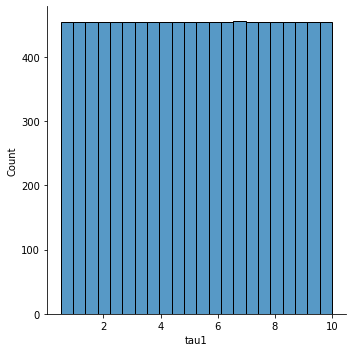

<Figure size 504x360 with 0 Axes>

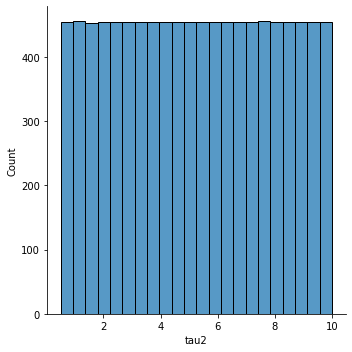

<Figure size 504x360 with 0 Axes>

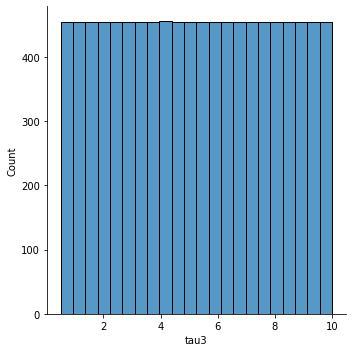

<Figure size 504x360 with 0 Axes>

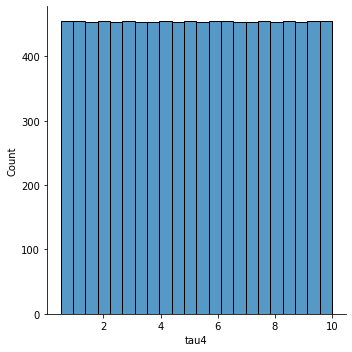

<Figure size 504x360 with 0 Axes>

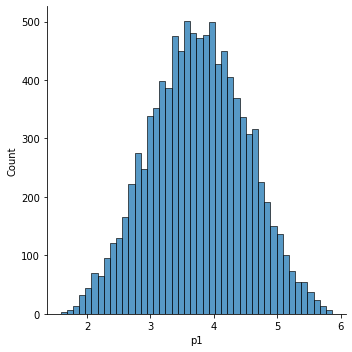

<Figure size 504x360 with 0 Axes>

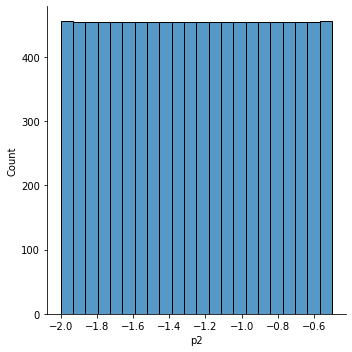

<Figure size 504x360 with 0 Axes>

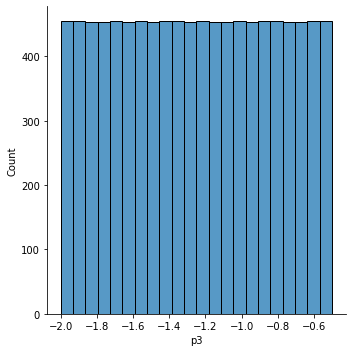

<Figure size 504x360 with 0 Axes>

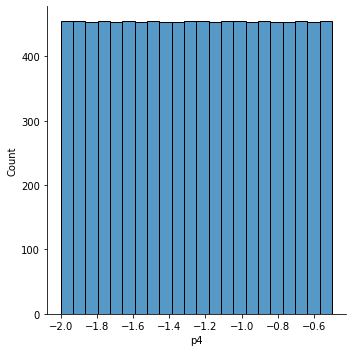

<Figure size 504x360 with 0 Axes>

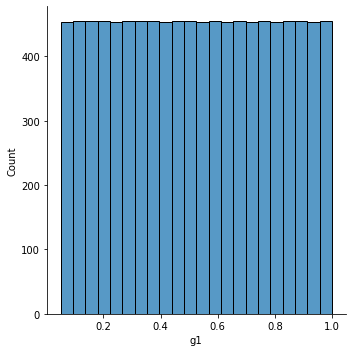

<Figure size 504x360 with 0 Axes>

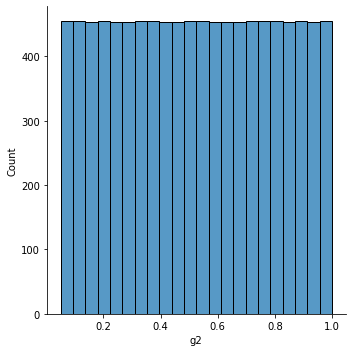

<Figure size 504x360 with 0 Axes>

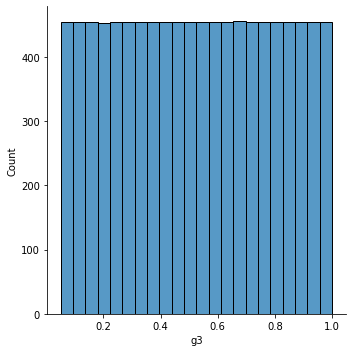

<Figure size 504x360 with 0 Axes>

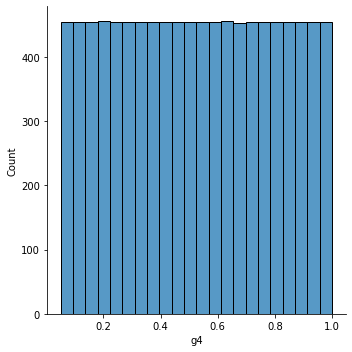

<Figure size 504x360 with 0 Axes>

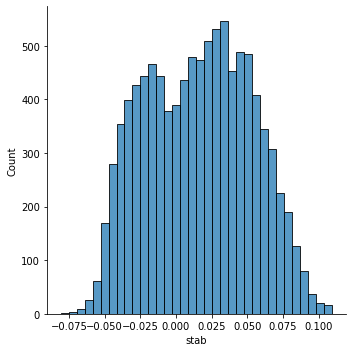

<Figure size 504x360 with 0 Axes>

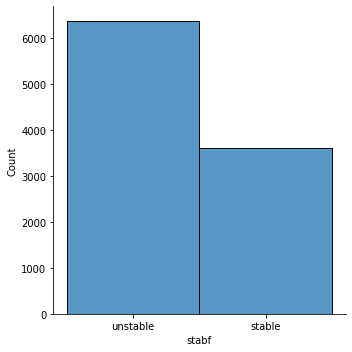

In [34]:
for col in df.columns:
    plt.figure(figsize=(7,5))
    sns.displot(df[col])

In [35]:
df['p1'].skew()

-0.012690009637862579

In [36]:
df['stab'].skew()

0.018663441851455305

In [37]:
df['stabf'].replace('unstable', "0", inplace = True)
df['stabf'].replace('stable', "1", inplace = True)
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,0
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,1
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,0
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,0
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,0


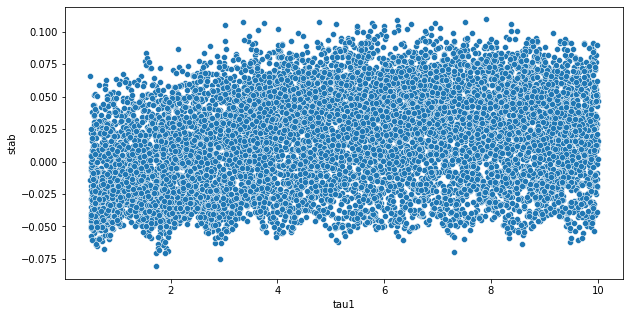

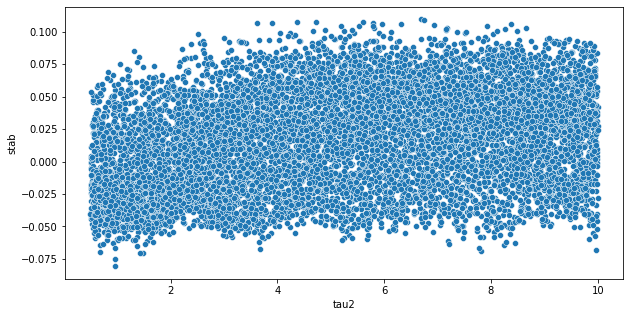

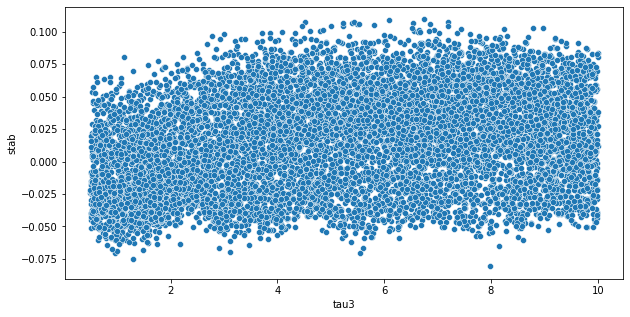

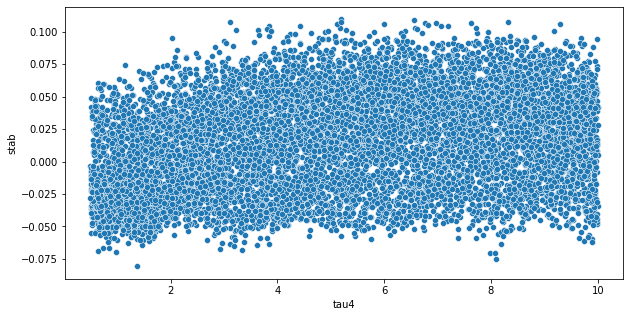

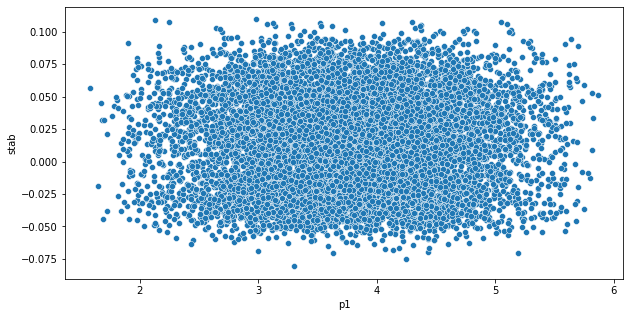

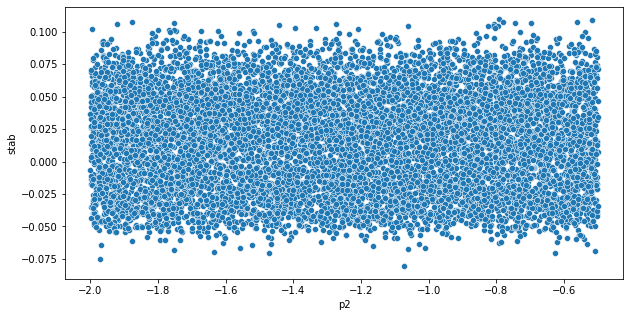

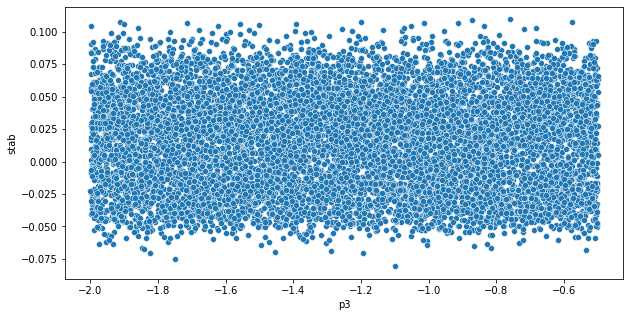

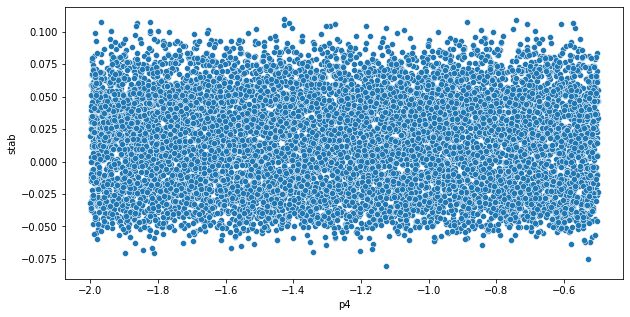

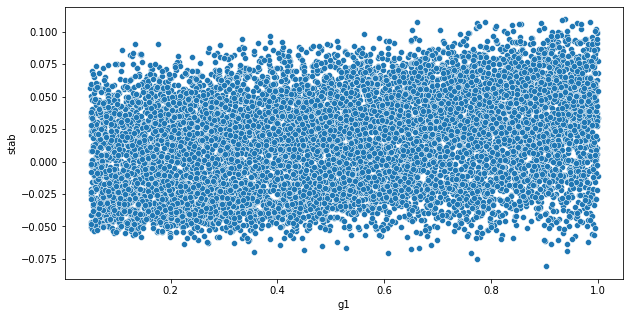

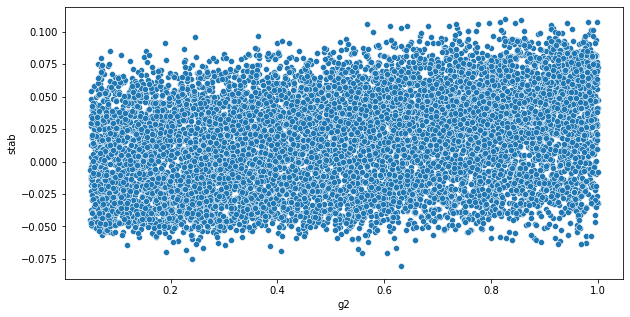

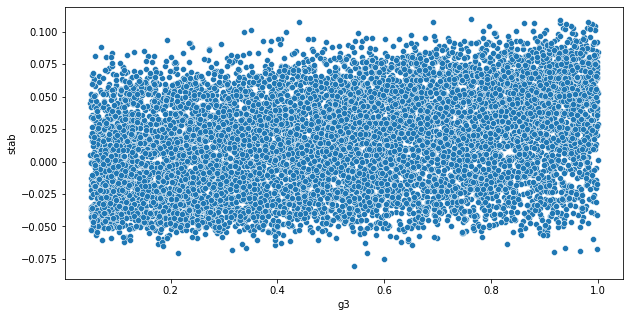

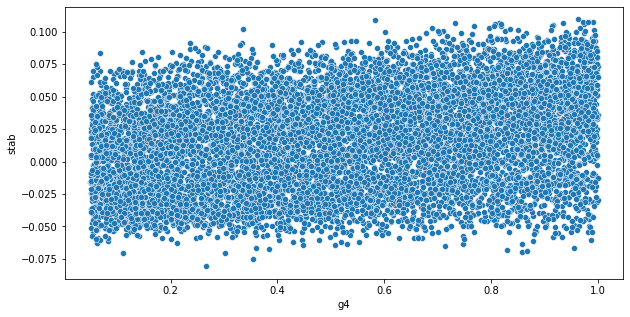

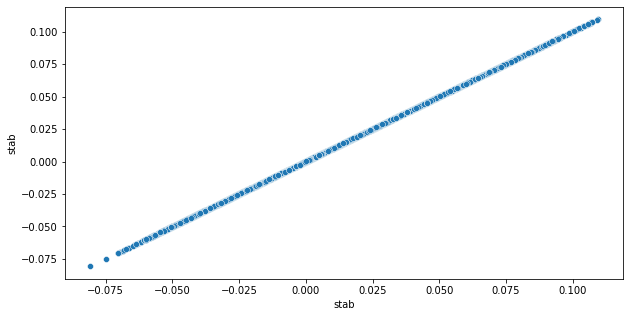

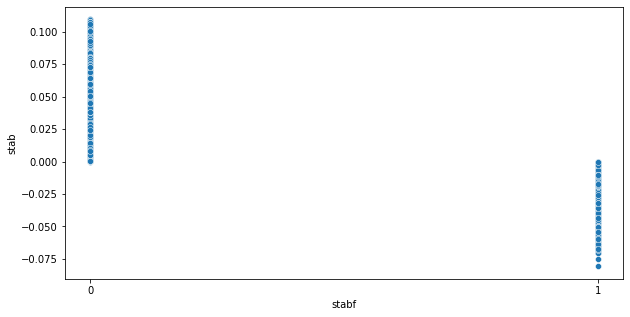

In [38]:
for col in df.columns:
    plt.figure(figsize=(10,5))
    sns.scatterplot(x=df[col], y='stab', data= df)

In [39]:
print("Split of unstable (0) and stable (1) observation in the orginal dataset:")
print(df['stabf'].value_counts(normalize=True))

Split of unstable (0) and stable (1) observation in the orginal dataset:
0    0.638
1    0.362
Name: stabf, dtype: float64


In [40]:
df['stabf'] = df['stabf'].astype('float64')

<AxesSubplot:>

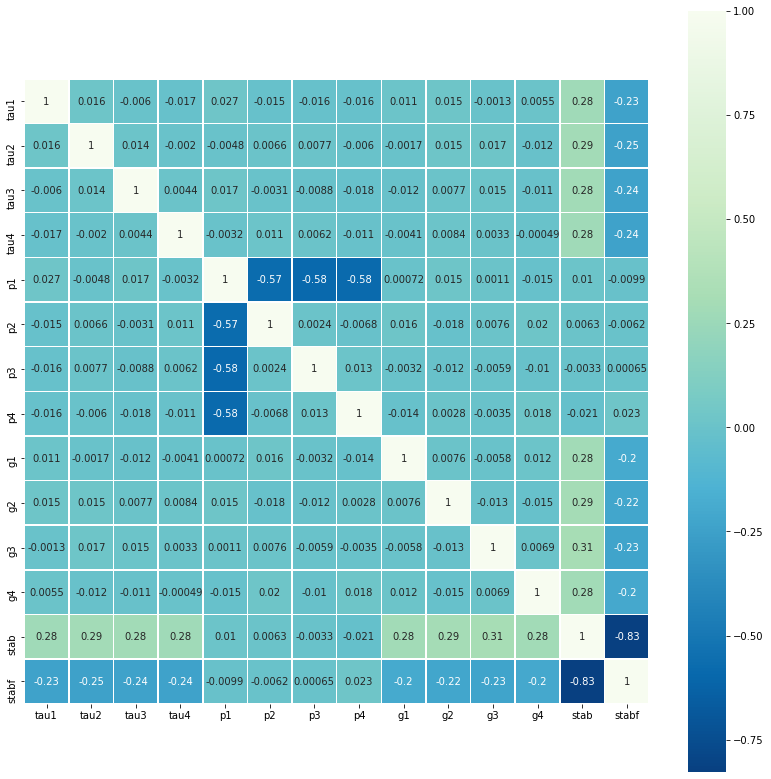

In [41]:
correlation = df.corr()
plt.figure(figsize=(14,14))
sns.heatmap(correlation,cmap='GnBu_r',annot=True, square = True ,linewidths=.5)

In [42]:
X = df.iloc[:, :12]
y = df.iloc[:, 13]

In [43]:
print(X.head())
print(y.head())

       tau1      tau2      tau3      tau4        p1        p2        p3  \
0  2.959060  3.079885  8.381025  9.780754  3.763085 -0.782604 -1.257395   
1  9.304097  4.902524  3.047541  1.369357  5.067812 -1.940058 -1.872742   
2  8.971707  8.848428  3.046479  1.214518  3.405158 -1.207456 -1.277210   
3  0.716415  7.669600  4.486641  2.340563  3.963791 -1.027473 -1.938944   
4  3.134112  7.608772  4.943759  9.857573  3.525811 -1.125531 -1.845975   

         p4        g1        g2        g3        g4  
0 -1.723086  0.650456  0.859578  0.887445  0.958034  
1 -1.255012  0.413441  0.862414  0.562139  0.781760  
2 -0.920492  0.163041  0.766689  0.839444  0.109853  
3 -0.997374  0.446209  0.976744  0.929381  0.362718  
4 -0.554305  0.797110  0.455450  0.656947  0.820923  
0    0.0
1    1.0
2    0.0
3    0.0
4    0.0
Name: stabf, dtype: float64


In [44]:
X = X.values
y = y.values

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 1)

print("X_train shape", X_train.shape)
print("X_test shape", X_test.shape)
print("y_train shape", y_train.shape)
print("y_test shape", y_test.shape)

X_train shape (8000, 12)
X_test shape (2000, 12)
y_train shape (8000,)
y_test shape (2000,)


In [46]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [47]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_hat = model.predict(X_test)

In [48]:
auc = roc_auc_score(y_test, y_hat)
print(auc)

0.7793635285086189


In [49]:
score = model.score(X_test, y_test)
print(score)

0.804


In [50]:
cm = confusion_matrix(y_test, y_hat)
cm

array([[1114,  174],
       [ 218,  494]], dtype=int64)

In [51]:

from keras.models import Sequential
from keras.layers import Dense

classifier = Sequential()

classifier.add(Dense(units = 24, kernel_initializer = 'uniform', activation ='relu', input_dim = 12))

classifier.add(Dense(units = 24, kernel_initializer = 'uniform', activation ='relu'))

classifier.add(Dense(units = 12, kernel_initializer = 'uniform', activation ='relu'))

classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation ='sigmoid'))

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [52]:
cross_val_round = 1
print("Model evaluation\n")

for train_index, val_index in KFold(10, shuffle=True, random_state=10).split(X_train):
    x_train, x_val = X_train[train_index], X_train[val_index]
    y_train, y_val = y_train[train_index], y_train[val_index]
    classifier.fit(x_train, y_train, epochs=50, verbose=0)
    classifier_loss, classifier_accuracy = classifier.evaluate(x_val, y_val)
    
    print('Round ' + str(cross_val_round) + "- Loss: " + str(classifier_loss)
         + "Accuracy: " + str(classifier_accuracy * 100) + "%")
    cross_val_round += 1

Model evaluation

25/25 [==============================] - 0s 439us/step - loss: 0.1614 - accuracy: 0.9337
Round 1- Loss: 0.16135691106319427Accuracy: 93.37499737739563%


IndexError: index 7201 is out of bounds for axis 0 with size 7200

In [53]:
y_pred = classifier.predict(X_test)
y_pred[y_pred <= 0.5] = 0
y_pred[y_pred > 0.5] = 1

In [54]:
cm = pd.DataFrame(data=confusion_matrix(y_test, y_pred, labels=[0, 1]),
                  index=["Actual Unstable", "Actual Stable"],
                  columns=["Predicted Unstable", "Predicted Stable"])
cm

,Predicted Unstable,Predicted Stable
Actual Unstable,1220,68
Actual Stable,44,668


In [55]:
print(f'Accuracy per the confusion matrix: {((cm.iloc[0, 0] + cm.iloc[1, 1]) / len(y_test) * 100):.2f}%')

Accuracy per the confusion matrix: 94.40%
